In [3]:
import pandas
titanic=pandas.read_csv("d://python/titanic_train.csv")
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
print(titanic["Sex"].unique())
titanic.loc[titanic["Sex"]=="male","Sex"]=0
titanic.loc[titanic["Sex"]=="female","Sex"]=1

['male' 'female']


In [7]:
print(titanic["Embarked"].unique())
titanic["Embarked"]=titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"]=='S',"Embarked"]=0
titanic.loc[titanic["Embarked"]=='C',"Embarked"]=1
titanic.loc[titanic["Embarked"]=='Q',"Embarked"]=2

['S' 'C' 'Q' nan]


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
alg=LinearRegression()
kf=KFold(n_splits=600,random_state=1,shuffle=False)
predictions=[]
for train,test in kf.split(titanic):
    train_predictors=(titanic[predictors].iloc[train,:])
    train_target=titanic["Survived"].iloc[train]
    alg.fit(train_predictors,train_target)
    test_predictions=alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)
    

In [30]:
import numpy as np
predictions=np.concatenate(predictions,axis=0)
predictions[predictions>.5]=1
predictions[predictions<=.5]=0
accuracy=sum(predictions[predictions==titanic["Survived"]])/len(predictions)
print(accuracy)

0.2671156004489338


In [32]:
titanic_test=pandas.read_csv("d://python/test.csv")
titanic_test["Age"]=titanic["Age"].fillna(titanic["Age"].median())

titanic_test.loc[titanic["Sex"]=="male","Sex"]=0
titanic_test.loc[titanic["Sex"]=="female","Sex"]=1

titanic_test["Embarked"]=titanic["Embarked"].fillna('S')
titanic_test.loc[titanic["Embarked"]=='S',"Embarked"]=0
titanic_test.loc[titanic["Embarked"]=='C',"Embarked"]=1
titanic_test.loc[titanic["Embarked"]=='Q',"Embarked"]=2

In [45]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
als=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=2,min_samples_leaf=1)
kf=model_selection.KFold(n_splits=5,random_state=1)
scores=model_selection.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=kf)
print(scores.mean())

0.37202471813325505


In [46]:
titanic["FamilySize"]=titanic["SibSp"]+titanic["Parch"]
titanic["NameLength"]=titanic["Name"].apply(lambda x:len(x))

In [50]:
import re
def get_title(name):
    title_search=re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ""
titles=titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Dr":5,"Rev":6,"Major":7,"Col":7,"Mlle":8,"Mme":8,"Don":9,"Lady":9,"Countess":10,"Ms":10,"Jonkheer":10,"Capt":10,"Sir":10}
for k,v in title_mapping.items():
    titles[titles==k]=v
print(pandas.value_counts(titles))
titanic["Title"]=titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Jonkheer      1
Don           1
Sir           1
Countess      1
Mme           1
Capt          1
Ms            1
Name: Name, dtype: int64
1     517
2     182
3     125
4      40
5       7
6       6
10      5
7       4
8       3
9       2
Name: Name, dtype: int64


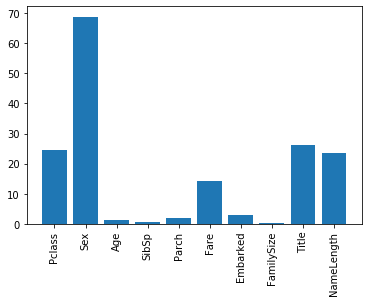

In [52]:
import numpy as np
from sklearn.feature_selection import SelectKBest,f_classif
import matplotlib.pyplot as plt
predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","FamilySize","Title","NameLength"]
selector=SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic["Survived"])
scores=-np.log10(selector.pvalues_)
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation="vertical")
plt.show()
predictors=["Pclass","Sex","Fare","Title"]
alg=RandomForestClass